In [1]:
import re
import requests
import numpy as np
import pandas as pd
from bs4 import BeautifulSoup  

In [2]:
url = "https://www.imdb.com/title/tt12735488/reviews/?ref_=tt_ql_2"

In [3]:
page = requests.get(url)
page

<Response [200]>

In [4]:
soup=BeautifulSoup(page.text)

In [5]:
from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.webdriver.common.action_chains import ActionChains
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
from bs4 import BeautifulSoup
import time

driver = webdriver.Chrome()

url = "https://www.imdb.com/title/tt12735488/reviews/?ref_=tt_ql_2"

driver.get(url)

def click_load_more():
    while True:
        try:
            load_more_button = WebDriverWait(driver, 10).until(
                EC.element_to_be_clickable((By.CLASS_NAME, 'ipl-load-more__button'))  
            ActionChains(driver).move_to_element(load_more_button).click(load_more_button).perform()
            
            time.sleep(3)
        except Exception as e:
            print("No more 'Load More' button found or error occurred:", e)
            break

click_load_more()

html_content = driver.page_source

soup = BeautifulSoup(html_content, 'html.parser')

review_titles = soup.find_all("a", class_="title")

reviews = []
for review in review_titles:
    text = review.get_text(strip=True)
    reviews.append(text)

driver.quit()


No more 'Load More' button found or error occurred: Message: 



In [6]:
len(reviews)

625

In [7]:
pd.DataFrame(reviews,columns=["Reviews"]).to_csv("KalskiIMDBReviews")

In [8]:
df = pd.read_csv(r"KalskiIMDBReviews")
df

,Unnamed: 0,Reviews
0,0,"Good attempt, story and is engaging, but"
1,1,A visual treat with a strong story & characters
2,2,Kalki: Epic Vision and Illuminating Indian His...
3,3,Kalki 2898: Is a Cinematic Masterpiece
4,4,"Majestic at scale, grandeur in VFX, and great ..."
...,...,...
620,620,Amitabh Bachchan & a power packed 2nd half red...
621,621,Delight
622,622,Kalki 2898 AD: A Visual Feast with Narrative H...
623,623,"A Promising Start, Hampered Execution."


In [9]:
df.drop("Unnamed: 0", axis = 1, inplace = True)

In [10]:
df

,Reviews
0,"Good attempt, story and is engaging, but"
1,A visual treat with a strong story & characters
2,Kalki: Epic Vision and Illuminating Indian His...
3,Kalki 2898: Is a Cinematic Masterpiece
4,"Majestic at scale, grandeur in VFX, and great ..."
...,...
620,Amitabh Bachchan & a power packed 2nd half red...
621,Delight
622,Kalki 2898 AD: A Visual Feast with Narrative H...
623,"A Promising Start, Hampered Execution."


In [11]:
import nltk
from nltk.sentiment import SentimentIntensityAnalyzer

In [12]:
sent = SentimentIntensityAnalyzer()

In [13]:
def SentiementAnalysis(text):
    score = sent.polarity_scores(text)["compound"]

    if score>0.1:
        return "Positive"
    elif score<= (-0.1):
        return "Negative"
    else:
        return "Neautral"

In [14]:
df["Result"] = df["Reviews"].apply(SentiementAnalysis)

In [15]:
df

,Reviews,Result
0,"Good attempt, story and is engaging, but",Positive
1,A visual treat with a strong story & characters,Positive
2,Kalki: Epic Vision and Illuminating Indian His...,Positive
3,Kalki 2898: Is a Cinematic Masterpiece,Positive
4,"Majestic at scale, grandeur in VFX, and great ...",Positive
...,...,...
620,Amitabh Bachchan & a power packed 2nd half red...,Neautral
621,Delight,Positive
622,Kalki 2898 AD: A Visual Feast with Narrative H...,Neautral
623,"A Promising Start, Hampered Execution.",Positive


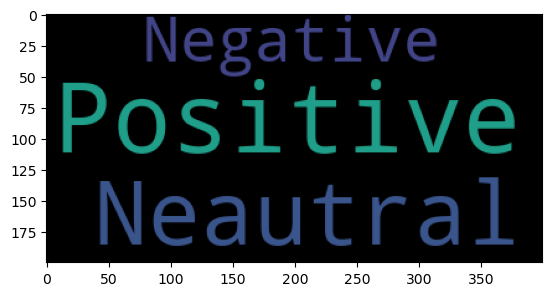

In [16]:
x = ' '.join(df["Result"].values)
from wordcloud import WordCloud
import matplotlib.pyplot as plt
cloud = WordCloud().generate(x)
plt.imshow(cloud)

<Axes: xlabel='Result'>

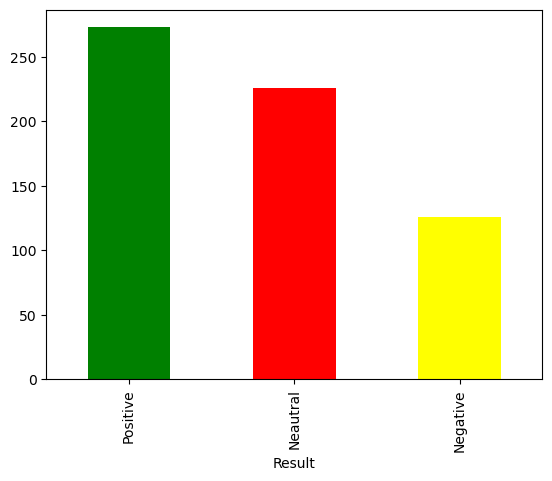

In [17]:
df["Result"].value_counts().plot(kind = "bar", color=["green","red","yellow"])

In [18]:
df

,Reviews,Result
0,"Good attempt, story and is engaging, but",Positive
1,A visual treat with a strong story & characters,Positive
2,Kalki: Epic Vision and Illuminating Indian His...,Positive
3,Kalki 2898: Is a Cinematic Masterpiece,Positive
4,"Majestic at scale, grandeur in VFX, and great ...",Positive
...,...,...
620,Amitabh Bachchan & a power packed 2nd half red...,Neautral
621,Delight,Positive
622,Kalki 2898 AD: A Visual Feast with Narrative H...,Neautral
623,"A Promising Start, Hampered Execution.",Positive
